In [ ]:
%pwd

In [1]:
import numpy as np
import Atom
import Molecule
import Ring
import OPLS as op
import System
import Conjugated_Polymer
import Cluster_IO
import Write_Inputs
import Write_Submit_Script
import math
import copy
import scipy
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib as mpl
from symfit import parameters, variables, sin, cos, Fit
import re
import time
import dill
from aromodel_lib import *

In [2]:
#File_Location = "~/Torsional_Parameterization"
#os.chdir("/Users/andrewkleinschmidt/Test_New_Torsional_Setup")
Input_File = "./test/P3HT_Input.txt"
XYZ_File = "./test/P3HT_Input.xyz"
#Input_File_Sidechains = "P3HT_Input_With_Sidechains.txt"
#XYZ_File_Sidechains = "P3HT_Input_With_Sidechains.xyz"
Input_File_Sidechains = Input_File
XYZ_File_Sidechains = XYZ_File
Polymer_Name = "P3HT"
Rotated_Shape = (7,36)
Min_Dih = 0
Max_Dih = 350
Min_OOP = 0
Max_OOP = 60
Fine_Rotated_Shape = (7,36)
Fine_Min_Dih = 0
Fine_Max_Dih = 360
Fine_Min_OOP = 0
Fine_Max_OOP = 30

OOP_Rotations = np.linspace(Min_OOP,Max_OOP,Rotated_Shape[0])
Dih_Rotations = np.linspace(Min_Dih,Max_Dih,Rotated_Shape[1])

In [3]:
%pwd

'/mnt/c/Users/Leon/Personal Document/College class material/2022 - 2.5 Summer/aromodel/code'

In [4]:
def Set_Up_Folders(path):
    folders = ["Bond_Parameters","Figures","Rotation_Run_Input_Copies","XYZ_Files","Hydrogenated_XYZ_Files",
    "Alternate_Hydrogenated_XYZ_Files","Nontorsional_Outputs","Nontorsional_Inputs","Hydrogenated_Improper_XYZ_Files",
    "Alternate_Hydrogenated_Improper_XYZ_Files","Multi_Ring_Hydrogenated_Rotation_Test"]
    for folder in folders:
        comb_path = path+"/"+folder
        if (not os.path.exists(path+"/"+folder)):
            os.mkdir(comb_path)

In [5]:
Set_Up_Folders('.')

In [6]:
#This function reads in the parameter file, assigns the atoms to rings, adds available LJ, coulombic, bonded, angular, dihedral, and improper potentials, 
#and tells the program whether it needs to parameterize missing bond potentials or partial charges. 
#Ring_List: NumPy array of Ring objects categorizing all available atoms into separate rings; 
#Paramaterize_Bond: Boolean that equals "True" if bond parameters for interring bonds have not been specified; 
#Paramaterize_Charges: Boolean that equals "True" if partial charges for atoms have not been specified

Ring_List,Parameterize_Bond,Parameterize_Charges = Read_Input(Input_File,XYZ_File,Polymer_Name) 
# cpu/0.15.4  gcc/9.2.0  openmpi/3.1.6

Writing slurm; File_Name: sub_P3HT_Methylthiophene_1_Optimize_Monomer, In_File: P3HT_Methylthiophene_1_Optimize_Monomer.inp, Job_Name: P3HT_Methylthiophene_1_Optimize_Monomer
P3HT_Methylthiophene_1_Optimize_Monomer.out
7192
Bond Length Check
10
Writing slurm; File_Name: sub_P3HT_Methylthiophene_2_Optimize_Monomer, In_File: P3HT_Methylthiophene_2_Optimize_Monomer.inp, Job_Name: P3HT_Methylthiophene_2_Optimize_Monomer
P3HT_Methylthiophene_2_Optimize_Monomer.out
7176
Bond Length Check
10


In [7]:
%pwd
print(len(Ring_List))

2


In [8]:
if Parameterize_Charges:
    Find_Charges(Ring_List,Polymer_Name) #Assign charges to each atom in each ring

In [9]:
if Parameterize_Bond:
    Strech_Bond(Ring_List,Polymer_Name) #Assign spring constants and equilibrium lengths to each interring potential

In [10]:
Make_Example_Files(Ring_List)

2
2
2
2
2
2
2
2
2
2
2
2


In [11]:
Offset_Ring_List = []
for ring in Ring_List[1:]:
    Offset_Ring_List.append(copy.deepcopy(ring))

In [12]:
Offset_Ring_List.append(copy.deepcopy(Ring_List[0]))
for ring1,ring2 in zip(Ring_List,Offset_Ring_List):
    Dimer = Conjugated_Polymer.Conjugated_Polymer([ring1,ring2])
    XYZ_Filename = Dimer.Write_XYZ()
    Hydrogenated_Dimer,_ = Dimer.Create_Hydrogenated_Copy(0,1)
    print(Hydrogenated_Dimer.Ring_List[0].Name)
    print(Hydrogenated_Dimer.Ring_List[0].Normal_Vector)
    print(Hydrogenated_Dimer.Ring_List[1].Normal_Vector)
    Hydrogenated_Dimer.Ring_List[1].Show_Normal_Vector()
    XYZ_Filename = Hydrogenated_Dimer.Write_XYZ()

2
2
2
2
Methylthiophene
[ 1.16462503e-04  5.32717052e-05 -9.99999992e-01]
[1.24995895e-04 1.64348974e-05 9.99999992e-01]
2
2
2
2
Methylthiophene
[1.24995895e-04 1.64348974e-05 9.99999992e-01]
[ 1.16462503e-04  5.32717052e-05 -9.99999992e-01]


In [13]:
Offset_Ring_List = []
Dual_Offset_Ring_List = []
Full_Trimer_Nontorsional_Energy_List = []
for ring in Ring_List[1:]:
    Offset_Ring_List.append(copy.deepcopy(ring))
for ring in Ring_List[2:]:
    Dual_Offset_Ring_List.append(copy.deepcopy(ring))

Offset_Ring_List.append(copy.deepcopy(Ring_List[0]))
Dual_Offset_Ring_List.append(copy.deepcopy(Ring_List[0]))
Dual_Offset_Ring_List.append(copy.deepcopy(Ring_List[1]))

In [14]:
for ring1,ring2,ring3 in zip(Ring_List,Offset_Ring_List,Dual_Offset_Ring_List):
    Trimer = Conjugated_Polymer.Conjugated_Polymer([ring1,ring2,ring3])
    XYZ_Filename = Trimer.Write_XYZ()

2
2
2
2
2
2
2
2
2
2
2
2


In [15]:
Extended_Ring_List = copy.deepcopy(Ring_List)
for i in range(1):
    for j in range(1):
        Extended_Ring_List.append(copy.deepcopy(Ring_List[j]))
Multimer = Conjugated_Polymer.Conjugated_Polymer(Extended_Ring_List)
Multimer.Write_XYZ()

2
2
2
2
2
2


'Methylthiophene_Phi_0_Theta_0_Methylthiophene_Phi_0_Theta_0_Methylthiophene.xyz'

In [16]:
#Forms n-mers of the rings up until a percentage limit of change is reached, then rotates their rings and calculates RI-MP2 energies, LAMMPS energies without bonded interactions, and nonbonded interaction energies; Returns N: the maximum number of rings tested; Torsional_Energies: an N by len(Ring_List) by Rotated_Shape[0] by Rotated_Shape[1]
LAMMPS_Energies = np.zeros(Rotated_Shape)
Quantum_Energies = np.zeros(Rotated_Shape)
Nonbonded_Energies = np.zeros(Rotated_Shape)

Offset_Ring_List = []
Dual_Offset_Ring_List = []
for ring in Ring_List[1:]:
    Offset_Ring_List.append(ring)

for ring in Ring_List[2:]:
    Dual_Offset_Ring_List.append(ring)

Offset_Ring_List.append(Ring_List[0])
Dual_Offset_Ring_List.append(Ring_List[0])
Dual_Offset_Ring_List.append(Ring_List[1])

Dih_Rotations_Degrees = np.linspace(0,Max_Dih + Max_Dih/Rotated_Shape[1]-1,Rotated_Shape[1]+1)
OOP_Rotations_Degrees = np.linspace(0,Max_OOP + Max_OOP/Rotated_Shape[0]-1,Rotated_Shape[0]+1)

In [17]:
#Calculate_Statistics(Input_File_Sidechains,XYZ_File_Sidechains,Polymer_Name,15,3)

In [18]:
Run_SPE_Methyl_Impropers(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)

Methylthiophene
Checking Methylthiophene_Improper_Bend_Methyl_Phi_0
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_10
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_20
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_30
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_40
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_50
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_60
Job Exists


In [19]:
Run_SPE_Methyl_Impropers(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name)

Methylthiophene
Checking Methylthiophene_Improper_Bend_Methyl_Phi_0
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_5
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_10
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_15
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_20
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_25
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl_Phi_30
Job Exists


In [20]:
Ring_By_Ring_Dual_Hydrogenated_End_File_Matrices = Run_Paired_Hydrogenation_Energy(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)

2
2
2
2
2
2
['Methylthiophene_Dihydrogenated_Syn.out', 'Methylthiophene_Dihydrogenated_Anti.out']
Writing slurm batch: File_Name: sub_Methylthiophene_Dual_Hydrogenated,
 Name: Methylthiophene_Dual_Hydrogenated,
 In_File_List: ['Methylthiophene_Dihydrogenated_Syn.qcin', 'Methylthiophene_Dihydrogenated_Anti.qcin'],
 Job_Type: QChem
Checking Methylthiophene_Dual_Hydrogenated
Job Exists
in Cluster_IO.submit_job, I've determined that the job finish status is True
2
2
2
2
2
2
['Methylthiophene_Dihydrogenated_Syn.out', 'Methylthiophene_Dihydrogenated_Anti.out']
Writing slurm batch: File_Name: sub_Methylthiophene_Dual_Hydrogenated,
 Name: Methylthiophene_Dual_Hydrogenated,
 In_File_List: ['Methylthiophene_Dihydrogenated_Syn.qcin', 'Methylthiophene_Dihydrogenated_Anti.qcin'],
 Job_Type: QChem
Checking Methylthiophene_Dual_Hydrogenated
Job Exists
in Cluster_IO.submit_job, I've determined that the job finish status is True


In [21]:
Ring_By_Ring_End_File_Matrices,Ring_By_Ring_Nontorsional_Energy,Ring_By_Ring_Improper_File_Matrices = Run_SPE_Dimers(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)


2
2
2
2
2
2
2
2

Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_60_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_60_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_70_

In [22]:
Ring_By_Ring_End_File_Matrices_Fine,Ring_By_Ring_Nontorsional_Energy_Fine,Ring_By_Ring_Improper_File_Matrices_Fine = Run_SPE_Dimers(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name)

2
2
2
2
2
2
2
2

Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_60_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_60_Methylthiophene
Job Exists

Checking Methylthiophene_Phi_0_Theta_70_

In [23]:
Ring_By_Ring_End_File_Matrices_Hydrogenated,Ring_By_Ring_Hydrogenated_Energy = Run_SPE_Dimers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_P

In [24]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Fine,Ring_By_Ring_Hydrogenated_Energy_Fine = Run_SPE_Dimers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_P

In [25]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Alternate,Ring_By_Ring_Hydrogenated_Energy_Alternate = Run_SPE_Dimers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Alternate=True)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated_Alternate
Job Exi

In [26]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Alternate_Fine,Ring_By_Ring_Hydrogenated_Energy_Alternate_Fine = Run_SPE_Dimers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Alternate=True)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated_Alternate
Job Exi

In [27]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers,Ring_By_Ring_Nontorsional_Energy_HI = Run_SPE_Impropers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated_Improper
Job Exists
Checkin

In [28]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers_Fine,Ring_By_Ring_Nontorsional_Energy_HI_Fine = Run_SPE_Impropers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_50_Methylthiophene_Hydrogenated_Improper
Job Exists
Checkin

In [29]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers_Alternate,Ring_By_Ring_Nontorsional_Energy_HI_Alternate = Run_SPE_Impropers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Alternate=True)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exi

In [30]:
Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers_Alternate_Fine,Ring_By_Ring_Nontorsional_Energy_HI_Alternate_Fine = Run_SPE_Impropers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Alternate=True)

2
2
2
2
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_10_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_20_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_30_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_40_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exi

In [ ]:
#Ring_By_Ring_End_File_Matrices_Trimer,Ring_By_Ring_Trimer_Nontorsional_Energy = Run_SPE_Trimers_Dih(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)

In [ ]:
#Ring_By_Ring_End_File_Matrices_Hydrogenated_Trimer,Syn_Anti_Matrices = Run_SPE_Trimers_Hydrogenated_Dih(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name)

In [31]:
Ring_By_Ring_Methyl_Impropers,Ring_By_Ring_Methyl_Improper_Lists,Dimer_Names = Return_SPE_Methyl_Impropers(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_Improper_File_Matrices)

Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improp

In [32]:
Ring_By_Ring_Methyl_Impropers_Fine,Ring_By_Ring_Methyl_Improper_Lists_Fine,Dimer_Names_Fine = Return_SPE_Methyl_Impropers(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Ring_By_Ring_Improper_File_Matrices_Fine)

Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improper_Bend_Methyl
Job Exists
Checking Methylthiophene_Improp

In [33]:
Ring_By_Ring_Hydrogenated_Energies = Return_SPE_Dimers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated)

2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methy

In [34]:
Ring_By_Ring_Hydrogenated_Energies_Fine = Return_SPE_Dimers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Fine)

2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methy

In [35]:
Ring_By_Ring_Hydrogenated_Alternate_Energies = Return_SPE_Dimers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Alternate,Alternate=True)

2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Meth

In [36]:
Ring_By_Ring_Hydrogenated_Alternate_Energies_Fine = Return_SPE_Dimers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Alternate_Fine,Alternate=True)

2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Alternate
Job Exists
Checking Meth

In [37]:
Combined_Ring_By_Ring_Hydrogenated_Energies,Combined_Ring_By_Ring_Hydrogenated_Energies_Tracker = Merge_Hydrogenated_Energies(Ring_By_Ring_Hydrogenated_Energies,Ring_By_Ring_Hydrogenated_Alternate_Energies)

Regular:
2.9541591207962483
Alternate:
0.22306056262459606
Regular:
2.945991141605191
Alternate:
0.1345578997861594
Regular:
2.7973096600035205
Alternate:
0.029296029824763536
Regular:
2.4888935355702415
Alternate:
0.0
Regular:
2.034293567761779
Alternate:
0.028476263862103224
Regular:
1.4733787223231047
Alternate:
0.09250354010146111
Regular:
0.9173385477624834
Alternate:
0.17149185959715396
Regular:
0.43607773655094206
Alternate:
0.2475848940666765
Regular:
0.1286865076981485
Alternate:
0.3196225216379389
Regular:
0.010327269556000829
Alternate:
0.3872357720974833
Regular:
0.09899640793446451
Alternate:
0.4424621725920588
Regular:
0.3729266384616494
Alternate:
0.4463796551572159
Regular:
0.8052046116208658
Alternate:
0.4108843646245077
Regular:
1.3812733937520534
Alternate:
0.371130294399336
Regular:
2.0882724983384833
Alternate:
0.44236729468684644
Regular:
2.8556081749266014
Alternate:
0.6585435546003282
Regular:
3.482261238270439
Alternate:
0.935800978448242
Regular:
3.86197309708

In [38]:
Combined_Ring_By_Ring_Hydrogenated_Energies_Fine,Combined_Ring_By_Ring_Hydrogenated_Energies_Tracker_Fine = Merge_Hydrogenated_Energies(Ring_By_Ring_Hydrogenated_Energies_Fine,Ring_By_Ring_Hydrogenated_Alternate_Energies_Fine)

Regular:
2.9541591207962483
Alternate:
0.4413893357850611
Regular:
2.945991141605191
Alternate:
0.35288667294662446
Regular:
2.7973096600035205
Alternate:
0.2476248029852286
Regular:
2.4888935355702415
Alternate:
0.21832877316046506
Regular:
2.034293567761779
Alternate:
0.24680503702256829
Regular:
1.4733787223231047
Alternate:
0.3108323132619262
Regular:
0.9173385477624834
Alternate:
0.389820632757619
Regular:
0.43607773655094206
Alternate:
0.46591366722714156
Regular:
0.1286865076981485
Alternate:
0.537951294798404
Regular:
0.010327269556000829
Alternate:
0.6055645452579483
Regular:
0.09899640793446451
Alternate:
0.6607909457525238
Regular:
0.3729266384616494
Alternate:
0.664708428317681
Regular:
0.8052046116208658
Alternate:
0.6292131377849728
Regular:
1.3812733937520534
Alternate:
0.589459067559801
Regular:
2.0882724983384833
Alternate:
0.6606960678473115
Regular:
2.8556081749266014
Alternate:
0.8768723277607933
Regular:
3.482261238270439
Alternate:
1.154129751608707
Regular:
3.861

In [39]:
Ring_By_Ring_Hydrogenated_Improper_Energies = Return_SPE_Dimers_Impropers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers)

Dimer Matrix size:
Hydrogenated
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job

In [40]:
Ring_By_Ring_Hydrogenated_Improper_Energies_Fine = Return_SPE_Dimers_Impropers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers_Fine)

Dimer Matrix size:
Hydrogenated
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper
Job

In [41]:
Ring_By_Ring_Hydrogenated_Alternate_Improper_Energies = Return_SPE_Dimers_Impropers_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers_Alternate,Alternate=True)

Dimer Matrix size:
Hydrogenated
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_A

In [42]:
Ring_By_Ring_Hydrogenated_Alternate_Improper_Energies_Fine = Return_SPE_Dimers_Impropers_Hydrogenated(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Impropers_Alternate_Fine,Alternate=True)

Dimer Matrix size:
Hydrogenated
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_Alternate
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene_Hydrogenated_Improper_A

In [43]:
Combined_Ring_By_Ring_Hydrogenated_Improper_Energies,Combined_Ring_By_Ring_Hydrogenated_Improper_Energies_Tracker = Merge_Hydrogenated_Improper_Energies(Ring_By_Ring_Hydrogenated_Improper_Energies,Ring_By_Ring_Hydrogenated_Alternate_Improper_Energies,Combined_Ring_By_Ring_Hydrogenated_Energies_Tracker)

In [44]:
Combined_Ring_By_Ring_Hydrogenated_Improper_Energies_Fine,Combined_Ring_By_Ring_Hydrogenated_Improper_Energies_Tracker_Fine = Merge_Hydrogenated_Improper_Energies(Ring_By_Ring_Hydrogenated_Improper_Energies_Fine,Ring_By_Ring_Hydrogenated_Alternate_Improper_Energies_Fine,Combined_Ring_By_Ring_Hydrogenated_Energies_Tracker_Fine)

In [45]:
Dimer_Energies,Dimer_Energies_Dict,Dimer_Energies_Corrected = Return_SPE_Dimers(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices,Ring_By_Ring_Nontorsional_Energy,Ring_By_Ring_Hydrogenated_Energies)

Dimer Matrix size:
(4, 7, 36)
Dimer Nonbonded Matrix size:
(4, 7, 36)
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exist

In [46]:
Dimer_Energies_Fine,Dimer_Energies_Dict_Fine,Dimer_Energies_Corrected_Fine = Return_SPE_Dimers(Ring_List,Fine_Rotated_Shape,Fine_Max_Dih,Fine_Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Fine,Ring_By_Ring_Nontorsional_Energy_Fine,Ring_By_Ring_Hydrogenated_Energies_Fine)

Dimer Matrix size:
(4, 7, 36)
Dimer Nonbonded Matrix size:
(4, 7, 36)
2
2
2
2
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exists
Checking Methylthiophene_Phi_0_Theta_0_Methylthiophene
Job Exist

In [47]:
OPLS_Fit_list = Control_Fit_OPLS(Dimer_Energies,Rotated_Shape)

3.1497705611166764
0.1381772669403067
[0.0, 3.542286559766356e-05, 0.00014171483231787758, 0.0003189459870756165, 0.0005672330651976456, 0.000886739336180874, 0.0012776744438678335, 0.001740294201151809, 0.0022749003393583425, 0.0028818402124772676, 0.003561506456459366, 0.004314336603815909, 0.0051408126537937325, 0.00604146059843331, 0.007016849904842278, 0.0080675929540547, 0.00919434443687078, 0.010397800707106771, 0.011678699092715773, 0.013037817165263997, 0.014475971968284089, 0.015994019205052813, 0.01759285238636806, 0.019273401938932698, 0.021036634274977303, 0.0228835508237836, 0.02481518702579605, 0.026832611290041004, 0.028936923915589406, 0.031129255977834433, 0.0334107681803787, 0.035782649673345365, 0.0382461168389579, 0.04080241204525466, 0.04345280236882769, 0.04619857828749595, 0.04904105234385106, 0.05198155778062781, 0.055021447148875274, 0.05816209088992903, 0.06140487589219465, 0.06475120402378433, 0.06820249064205107, 0.07176016308109595, 0.07542565911833732, 0.

In [48]:
#Merged_OOP_Rotations_Degrees,Merged_Raw_Dimer_Energies = Merge_Coarse_Fine(Rotated_Shape,Max_OOP,Max_Dih,Fine_Rotated_Shape,Fine_Max_OOP,Fine_Max_Dih,Dimer_Energies,Dimer_Energies_Fine)

In [49]:
#Check this-- Merged Raw Dimer Energies is based on corrected #. Doesn't appear to matter but still
Merged_OOP_Rotations_Degrees,Merged_Raw_Dimer_Energies = Merge_Coarse_Fine(Rotated_Shape,Max_OOP,Max_Dih,Fine_Rotated_Shape,Fine_Max_OOP,Fine_Max_Dih,Dimer_Energies_Corrected,Dimer_Energies_Corrected_Fine)

[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 60.0]
(4, 10, 36)


In [50]:
Dimer_Weights = Weight_Impropers(Merged_Raw_Dimer_Energies,5000)

In [51]:
#Dually_Hydrogenated_Energies = Return_Dually_Hydrogenated(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_Dual_Hydrogenated_End_File_Matrices,Syn_Anti_Matrices)

In [52]:
Ring_By_Ring_Nonbonded_Energies = np.asarray(Combined_Ring_By_Ring_Hydrogenated_Energies) - np.asarray(Combined_Ring_By_Ring_Hydrogenated_Improper_Energies)

In [53]:
Nonbonded_Energies = np.array(Ring_By_Ring_Hydrogenated_Energies) - np.array(Ring_By_Ring_Hydrogenated_Improper_Energies)
Nonbonded_Energies_Alternate = np.array(Ring_By_Ring_Hydrogenated_Alternate_Energies) - np.array(Ring_By_Ring_Hydrogenated_Alternate_Improper_Energies)

In [54]:
Ring_By_Ring_Nonbonded_Energies,_ = Merge_Hydrogenated_Energies(Nonbonded_Energies,Nonbonded_Energies_Alternate)

Regular:
1.181272828776855
Alternate:
0.21763224835740402
Regular:
1.1635369805735536
Alternate:
0.1305235141189769
Regular:
1.035284953773953
Alternate:
-0.03114740562159568
Regular:
0.8358877927530557
Alternate:
-0.1814034102135338
Regular:
0.601222621742636
Alternate:
-0.31414017936913297
Regular:
0.3642452387721278
Alternate:
-0.43977383692981675
Regular:
0.1922257772530429
Alternate:
-0.5376702373614535
Regular:
0.07258166995598003
Alternate:
-0.6264461136888713
Regular:
0.022025124402716756
Alternate:
-0.6782672598492354
Regular:
0.00959855376277119
Alternate:
-0.6940849033999257
Regular:
0.03279195766663179
Alternate:
-0.679297301103361
Regular:
0.07322134339483455
Alternate:
-0.6685236907796934
Regular:
0.15108154353220016
Alternate:
-0.6604032760951668
Regular:
0.31570227799238637
Alternate:
-0.6141246490878984
Regular:
0.6280559650622308
Alternate:
-0.43798069283366203
Regular:
1.0757917728624307
Alternate:
-0.10152466816361994
Regular:
1.473172776750289
Alternate:
0.27562579

In [55]:
for names,energies in zip(Dimer_Names,Ring_By_Ring_Nonbonded_Energies):
    energies = energies - np.amin(energies[0])
    fig,ax = plt.subplots(1,1)
    x,y = np.meshgrid(Dih_Rotations_Degrees,OOP_Rotations_Degrees)
    c = ax.pcolor(x,y,energies,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Nonbonded Energies',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Nonbonded_Energies' % (names[0],names[1]))
    plt.close(fig)

for ring in Ring_By_Ring_Nonbonded_Energies:
    ring = ring - np.amin(ring[0])

In [56]:
E_conjugation = np.asarray(Ring_By_Ring_Methyl_Impropers)
Dimer_Energies = np.asarray(Dimer_Energies)

E_delocalization = Dimer_Energies - E_conjugation - Ring_By_Ring_Nonbonded_Energies
#E_delocalization = Dimer_Energies - Ring_By_Ring_Nonbonded_Energies

In [57]:
Dih_Rotations_Degrees = np.linspace(0,Max_Dih + Max_Dih/Rotated_Shape[1]-1,Rotated_Shape[1]+1)
OOP_Rotations_Degrees = np.linspace(0,Max_OOP + Max_OOP/Rotated_Shape[0]-1,Rotated_Shape[0]+1)
print(E_delocalization.shape)
print(len(Dih_Rotations_Degrees))
print(len(OOP_Rotations_Degrees))
Make_Surface_Plot(Dih_Rotations_Degrees,OOP_Rotations_Degrees,E_delocalization[0],'%s_Unfit_Conjugated_Energies' % (Polymer_Name),Title='RI-MP2 Energies',xlabel='Dihedral (degrees)',ylabel='Out of Plane (degrees)')

(4, 7, 36)
37
8


In [58]:
Ring_By_Ring_Nonbonded_Energies_Fine = np.asarray(Combined_Ring_By_Ring_Hydrogenated_Energies_Fine) - np.asarray(Combined_Ring_By_Ring_Hydrogenated_Improper_Energies_Fine)

Nonbonded_Energies_Fine = np.array(Ring_By_Ring_Hydrogenated_Energies_Fine) - np.array(Ring_By_Ring_Hydrogenated_Improper_Energies_Fine)
Nonbonded_Energies_Alternate_Fine = np.array(Ring_By_Ring_Hydrogenated_Alternate_Energies_Fine) - np.array(Ring_By_Ring_Hydrogenated_Alternate_Improper_Energies_Fine)
Ring_By_Ring_Nonbonded_Energies_Fine,_ = Merge_Hydrogenated_Energies(Nonbonded_Energies_Fine,Nonbonded_Energies_Alternate_Fine)

for ring in Ring_By_Ring_Nonbonded_Energies:
    ring = ring - np.amin(ring[0])

E_conjugation_Fine = np.asarray(Ring_By_Ring_Methyl_Impropers_Fine)
Dimer_Energies_Fine = np.asarray(Dimer_Energies_Fine)
E_delocalization_Fine = Dimer_Energies_Fine - E_conjugation_Fine - Ring_By_Ring_Nonbonded_Energies_Fine
#E_delocalization_Fine = Dimer_Energies_Fine - Ring_By_Ring_Nonbonded_Energies_Fine

Regular:
1.181272828776855
Alternate:
0.28847179003059864
Regular:
1.1635369805735536
Alternate:
0.2013630557921715
Regular:
1.035284953773953
Alternate:
0.039692136051598936
Regular:
0.8358877927530557
Alternate:
-0.11056386854033917
Regular:
0.601222621742636
Alternate:
-0.24330063769593835
Regular:
0.3642452387721278
Alternate:
-0.36893429525662214
Regular:
0.1922257772530429
Alternate:
-0.46683069568825886
Regular:
0.07258166995598003
Alternate:
-0.5556065720156766
Regular:
0.022025124402716756
Alternate:
-0.6074277181760408
Regular:
0.00959855376277119
Alternate:
-0.6232453617267311
Regular:
0.03279195766663179
Alternate:
-0.6084577594301663
Regular:
0.07322134339483455
Alternate:
-0.5976841491064988
Regular:
0.15108154353220016
Alternate:
-0.5895637344219722
Regular:
0.31570227799238637
Alternate:
-0.5432851074147038
Regular:
0.6280559650622308
Alternate:
-0.3671411511604674
Regular:
1.0757917728624307
Alternate:
-0.03068512649042532
Regular:
1.473172776750289
Alternate:
0.346465

In [59]:
Merged_OOP_Rotations_Degrees,Merged_Delocalization_Energies = Merge_Coarse_Fine(Rotated_Shape,Max_OOP,Max_Dih,Fine_Rotated_Shape,Fine_Max_OOP,Fine_Max_Dih,E_delocalization,E_delocalization_Fine)

[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 60.0]
(4, 10, 36)


In [60]:
Merged_OOP_Rotations_Degrees,Merged_Conjugation_Energies = Merge_Coarse_Fine(Rotated_Shape,Max_OOP,Max_Dih,Fine_Rotated_Shape,Fine_Max_OOP,Fine_Max_Dih,E_conjugation,E_conjugation_Fine)

[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 60.0]
(4, 10, 36)


In [61]:
Merged_OOP_Rotations_Degrees,Merged_Nonbonded_Energies = Merge_Coarse_Fine(Rotated_Shape,Max_OOP,Max_Dih,Fine_Rotated_Shape,Fine_Max_OOP,Fine_Max_Dih,Ring_By_Ring_Nonbonded_Energies,Ring_By_Ring_Nonbonded_Energies_Fine)

[0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 40.0, 50.0, 60.0]
(4, 10, 36)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

NameError: free variable 'q' referenced before assignment in enclosing scope

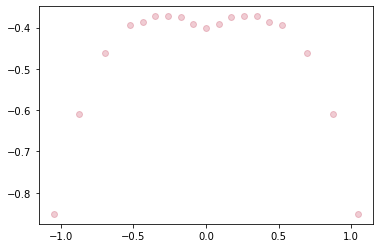

In [62]:
Force_x,Force_y,Fit_Energies,Deloc_Coarse_Energies,a_params_list,b_params_list,a0_params_list = Fit_Improper_Energies(Merged_Delocalization_Energies,Ring_List,Rotated_Shape,Merged_OOP_Rotations_Degrees,Dimer_Weights)

In [ ]:
Nonbonded_Force_x,Nonbonded_Force_y,Nonbonded_Fit_Energies,Nonbonded_Coarse_Energies,Nonbonded_a_params_list,Nonbonded_b_params_list,Nonbonded_a0_params_list = Fit_Improper_Energies(Merged_Nonbonded_Energies,Ring_List,Rotated_Shape,Merged_OOP_Rotations_Degrees,Dimer_Weights,Nonbonded=True)

In [ ]:
Conjugated_Parameters = Fit_Conjugated_Energies(Merged_Conjugation_Energies,Merged_OOP_Rotations_Degrees)

In [ ]:
#Write_Example_Plumed_Script(Polymer_Name,"N2200_Input.txt","N2200_Input.xyz",Fit_Energies,Force_y,Force_x,1,Folder_Name = "Dimer_Plumed_PNDI_T") #Plumed Script for dimer w/o sidechains

In [ ]:
#dill.dump_session('N2200_env.db')
Write_All_Dimers_Plumed(Ring_List,Fit_Energies,Force_y,Force_x,Polymer_Name)

In [ ]:
Calculate_Conventional_Energies(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,OPLS_Fit_list)

In [ ]:
#os.chdir("/Users/andrewkleinschmidt/Test_New_Torsional_Setup")
#dill.load_session("N2200_env.db")

Check_New_Torsional_Energy(Ring_List,Polymer_Name,Rotated_Shape,a_params_list,b_params_list,a0_params_list,OPLS_Fit_list,Conjugated_Parameters,Nonbonded_a_params_list,Nonbonded_b_params_list,Nonbonded_a0_params_list)

In [ ]:
Compare_Rigidity_Types(Merged_Conjugation_Energies,Merged_Delocalization_Energies,Merged_Nonbonded_Energies,Merged_OOP_Rotations_Degrees)

In [ ]:
print("hi")
reload(Molecule)
reload(Atom)
reload(Conjugated_Polymer)
Write_Conventional_Data_File(Polymer_Name,Input_File_Sidechains,XYZ_File_Sidechains,15,OPLS_Fit_list,Folder_Name="Conventional_Scripts")

In [ ]:
Write_Conventional_Data_File(Polymer_Name + "_Noninteracting",Input_File_Sidechains,XYZ_File_Sidechains,15,OPLS_Fit_list,Folder_Name="Conventional_Scripts",Non_Interacting=True)

In [ ]:
Conjugated_Ring_List = []
for i in range(0,len(Ring_List),2):
    Conjugated_Ring_List.append(Ring_List[i+1])
    Conjugated_Ring_List.append(Ring_List[i])

for ring,params in zip(Conjugated_Ring_List,Conjugated_Parameters):
    for b_atom in ring.Bonded_Atoms:
        b_atom.Add_Improper_Params(params[0],params[1],params[2])

In [ ]:
Polymer_Rings,Parameterize_Bond,Parameterize_Charges = Read_Input(Input_File_Sidechains,XYZ_File_Sidechains,Polymer_Name)

Conjugated_Polymer_Ring_List = []
for i in range(0,len(Polymer_Rings),2):
    Conjugated_Polymer_Ring_List.append(Polymer_Rings[i+1])
    Conjugated_Polymer_Ring_List.append(Polymer_Rings[i])

for ring,params in zip(Conjugated_Polymer_Ring_List,Conjugated_Parameters):
    for b_atom in ring.Bonded_Atoms:
        b_atom.Add_Improper_Params(params[0],params[1],params[2])

In [ ]:
Polymer_Ring_List = []
for i in range(15):
    for ring in Polymer_Rings:
        Polymer_Ring_List.append(copy.deepcopy(ring))

for ring,params in zip(Polymer_Ring_List,Conjugated_Parameters):
    for b_atom in ring.Bonded_Atoms:
        b_atom.Add_Improper_Params(params[0],params[1],params[2])

In [ ]:
reload(Atom)
reload(Conjugated_Polymer)

Write_Example_Plumed_Script(Polymer_Ring_List,Fit_Energies,Force_y,Force_x,Polymer_Name,Folder_Name="./Full_Polymer_Plumed") #Plumed Script for full polymer
Write_Example_Plumed_Script(Polymer_Ring_List,Fit_Energies,Force_y,Force_x,Polymer_Name+"_Noninteracting",Folder_Name="./Full_Polymer_Plumed",Non_Interacting=True,Nonbonded_Fit_Energies=Nonbonded_Fit_Energies,Nonbonded_Force_x=Nonbonded_Force_x,Nonbonded_Force_y=Nonbonded_Force_y) #Plumed Script for full polymer with no LJ and Coulombic interactions

In [ ]:
reload(Molecule)
reload(Conjugated_Polymer)
reload(System)
import sys
sys.setrecursionlimit(10000)
Polymer = Conjugated_Polymer.Conjugated_Polymer(Polymer_Ring_List)

Bond_Atoms = []
for bond in Polymer.Interring_Bond_List:
        if bond.Bond_Master not in Bond_Atoms:
            Bond_Atoms.append(bond.Bond_Master)
        if bond.Bond_Slave not in Bond_Atoms:
            Bond_Atoms.append(bond.Bond_Slave)
System_List = []
#Comp_List = np.ones(60,dtype=int)
Comp_List = np.ones(30,dtype=int)
#for poly in range(60):
for poly in range(30):
    Polymer = Conjugated_Polymer.Conjugated_Polymer(Polymer_Ring_List)
    Polymer.Replace_Interring_Dihedrals(0,0,[0.0,0.0,0.0,0.0])
    Molecule.Assign_Lammps([Polymer])
    for atom in Polymer.Atom_List:
        atom.Charge = 0.0
        atom.Epsilon = 0.0
        atom.Sigma = 4.0
    Polymer.Randomize_Torsions(Deloc_Coarse_Energies[0][3:-3]/4.184,Nonbonded_Coarse_Energies[0][3:-3]/4.184)
    System_List.append(copy.deepcopy(Polymer))
#Film = System.System(System_List,Comp_List,80.0,"PNDI_T_Film_60_30mers")
Film = System.System(System_List,Comp_List,64.0,"P3HT_Film_30_30mers_COLVAR_torsion")
Film.Gen_Rand()
Film.Write_LAMMPS_Data()
Film.Write_Plumed_Files(Comp_List,"P3HT_Film",Fit_Energies,Force_y,Force_x,Reverse = True,Folder_Name="./Full_Polymer_Plumed")
#Polymer.Write_Data_File("Test_Randomize.data",Exclude_Interring_Dihedrals=True,Bond_Atoms=Bond_Atoms,Soft_Potential=True)

In [ ]:
reload(Molecule)
reload(Conjugated_Polymer)
reload(System)
import sys
sys.setrecursionlimit(10000)
Conventional_Polymer = Conjugated_Polymer.Conjugated_Polymer(Polymer_Ring_List)
Molecule.Assign_Lammps([Conventional_Polymer])
Conventional_Polymer.Replace_Interring_Dihedrals(0,0,OPLS_Fit_list[0])
Bond_Atoms = []
for bond in Conventional_Polymer.Interring_Bond_List:
        if bond.Bond_Master not in Bond_Atoms:
            Bond_Atoms.append(bond.Bond_Master)
        if bond.Bond_Slave not in Bond_Atoms:
            Bond_Atoms.append(bond.Bond_Slave)
System_List = []
#Comp_List = np.ones(60,dtype=int)
Comp_List = np.ones(30,dtype=int)
#for poly in range(60):
for atom in Conventional_Polymer.Atom_List:
    atom.Charge = 0.0
    atom.Epsilon = 0.0
    atom.Sigma = 4.0
for poly in range(30):
    System_List.append(copy.deepcopy(Conventional_Polymer))

#Film = System.System(System_List,Comp_List,80.0,"PNDI_T_Film_60_30mers")
Film = System.System(System_List,Comp_List,64.0,"P3HT_Film_30_30mers_Dihedral_torsion")
Film.Gen_Rand()
Film.Update_Atom_Positions("P3HT_Film_30_30mers_COLVAR_torsion.data")
Film.Write_LAMMPS_Data()

In [ ]:
fig,ax = plt.subplots(1,1)
ax.plot(Dih_Rotations,E_delocalization[0][0],label="Colvar-Torsion")
ax.plot(Dih_Rotations,Dimer_Energies[0][0],label="Dihedral-Torsion")
plt.xlabel("Degrees ()",size=24)
plt.ylabel("Energy (kcal/mol)",size=24)
plt.tight_layout()
ax.legend()
fig.savefig('%s_Figure2' % ("P3HT"))
print()

In [ ]:
Reverse = False
Base_Calculate_Torsions_String = Polymer_Name + "_Calculate_Torsions_Conventional"
index = 1
Num_Atoms = 1
Num_Rings = 0
oop_blocks = np.linspace(0,2*math.pi,200)
dih_blocks = np.linspace(-math.pi,math.pi,200)
torsion_file = open(Base_Calculate_Torsions_String + ".dat", 'w')
for mol in Film.Molecule_List:
    Bond_Atoms = []
    for bond in mol.Interring_Bond_List:
        if bond.Bond_Master not in Bond_Atoms:
            Bond_Atoms.append(bond.Bond_Master)
        if bond.Bond_Slave not in Bond_Atoms:
            Bond_Atoms.append(bond.Bond_Slave)

    torsion_file.write("\n\nc%d: CENTER ATOMS=%d" % (index,mol.Ring_List[0].Core_Atom_List[0].System_ID))
    for atom in mol.Ring_List[0].Core_Atom_List[1:]:
        torsion_file.write(",%d" % atom.System_ID)
    torsion_file.write("\n\nc%d_normal: GHOST ATOMS=c1,%d,%d COORDINATES=0.0,1.0,0.0\n\n" % (index,mol.Ring_List[0].Core_Atom_List[0].System_ID,mol.Ring_List[0].Core_Atom_List[1].System_ID))

    for i in range(1,len(mol.Ring_List)):
        index += 1
        for b_atom in mol.Ring_List[i].Bonded_Atoms:
            if b_atom.Is_Linked and b_atom.Interring_Bond_Atom.Self_Ring.Ring_ID == i:
                atom1 = b_atom.Interring_Bond_Atom.Central_Atom.System_ID
                atom2 = b_atom.Central_Atom.System_ID
                ring1_batom1 = b_atom.Interring_Bond_Atom.Same_Ring_Bonded_Atom_List[0].System_ID
                ring1_batom2 = b_atom.Interring_Bond_Atom.Same_Ring_Bonded_Atom_List[1].System_ID
                ring2_batom1 = b_atom.Same_Ring_Bonded_Atom_List[0].System_ID
                ring2_batom2 = b_atom.Same_Ring_Bonded_Atom_List[1].System_ID
        torsion_file.write("\n\nc%d: CENTER ATOMS=%d" % (index,mol.Ring_List[i].Core_Atom_List[0].System_ID))
        for atom in mol.Ring_List[i].Core_Atom_List[1:]:
            torsion_file.write(",%d" % atom.System_ID)
        torsion_file.write("\n\nc%d_normal: GHOST ATOMS=c%d,%d,%d COORDINATES=0.0,1.0,0.0\n\n" % (index,index,mol.Ring_List[i].Core_Atom_List[0].System_ID,mol.Ring_List[i].Core_Atom_List[1].System_ID))
        if Reverse:
            torsion_file.write("DIH_%d: TORSION VECTOR1=c%d_normal,c%d AXIS=%d,%d VECTOR2=c%d_normal,c%d\n\n" % (index-1,index-1,index-1,atom2,atom1,index,index))
        else:
            torsion_file.write("DIH_%d: TORSION VECTOR1=c%d,c%d_normal AXIS=%d,%d VECTOR2=c%d,c%d_normal\n\n" % (index-1,index-1,index-1,atom1,atom2,index,index))
        torsion_file.write("OOP_%d_1: TORSION ATOMS=%d,%d,%d,%d\n\n" % (index-1,atom1,ring1_batom1,ring1_batom2,atom2))
        torsion_file.write("OOP_%d_2: TORSION ATOMS=%d,%d,%d,%d\n\n" % (index-1,atom2,ring2_batom1,ring2_batom2,atom1))
        torsion_file.write("OOP_%d: MATHEVAL ARG=OOP_%d_1,OOP_%d_2 FUNC=abs(x)+abs(y) PERIODIC=NO\n\n" % (index-1,index-1,index-1))
        torsion_file.write("PRINT ARG=DIH_%d,OOP_%d FILE=colvar_%d.txt STRIDE=100\n\n" % (index-1,index-1,index-1))

    torsion_file.write("WHOLEMOLECULES ENTITY0=%d-%d" % (Num_Atoms,Num_Atoms+len(mol.Atom_List)-1))
    Num_Atoms += len(mol.Atom_List)
    Num_Rings += len(mol.Ring_List)
    for i in range(1,len(mol.Ring_List)):
        torsion_file.write(",c%d,c%d_normal" % (i,i))
    index += 1

torsion_file.close()

In [ ]:
Sub_Directory = "./Polymer_Plumed_P3HT"
Colvars = f.readlines()
torsion_index = 1
torsion_indices = []
for polymer_num in range(30):
    for torsion_num in range(30):
        torsion_indices.append(torsion_index)
        torsion_index += 1
    torsion_index += 1
for colvar_num in torsion_indices:
    f = open(Sub_Directory + "/colvar_%d.txt" % colvar_num,'r')
    for line in Colvars[-1::-1]:
        if len(line.strip().split()) == 3 and all((ch.isdigit() or ch == ".") for ch in line.strip().split()[0].strip()):
            Colvar_DIH_List.append(float(line.strip().split()[1].strip()))
            Colvar_OOP_List.append(float(line.strip().split()[2].strip()))
            break
    f.close()

In [ ]:
Nonbonded_Modifiers = [0.0,0.5,1.0,2.0]
Delocalization_Modifiers = [0.0,0.5,1.0,2.0]

for n_mod in Nonbonded_Modifiers:
    for d_mod in Delocalization_Modifiers:
        Write_Example_Plumed_Script(Polymer_Ring_List,Fit_Energies,Force_y,Force_x,Polymer_Name+"_Noninteracting",Folder_Name="./Full_Polymer_Plumed",Non_Interacting=True,Nonbonded_Fit_Energies=Nonbonded_Fit_Energies,Nonbonded_Force_x=Nonbonded_Force_x,Nonbonded_Force_y=Nonbonded_Force_y,Delocalization_Modifier=d_mod,Nonbonded_Modifier=n_mod)

In [ ]:
Make_Solvated_Box(Polymer_Ring_List,Polymer_Name,"Chlorobenzene")

In [ ]:
Ring_By_Ring_Total_Trimer_Energy = Return_SPE_Trimers_Dih(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Trimer,Dimer_Energies_Dict,Ring_By_Ring_Trimer_Nontorsional_Energy)

Ring_By_Ring_Hydrogenated_Trimer_Energy =  Return_SPE_Trimers_Hydrogenated_Dih(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,Ring_By_Ring_End_File_Matrices_Hydrogenated_Trimer,Dimer_Energies_Dict,Ring_By_Ring_Trimer_Nontorsional_Energy)

Calculate_Trimer_Long_Range_Energy(Ring_List,Rotated_Shape,Max_Dih,Max_OOP,Polymer_Name,E_delocalization,Ring_By_Ring_Hydrogenated_Improper_Energies,Ring_By_Ring_Total_Trimer_Energy,Ring_By_Ring_Hydrogenated_Trimer_Energy,Ring_By_Ring_End_File_Matrices_Trimer,Dually_Hydrogenated_Energies,Ring_By_Ring_Nonbonded_Energies)
for names,energies in zip(Dimer_Names,Ring_By_Ring_Nonbonded_Energies):
    energies = energies - np.amin(energies[0])
    fig,ax = plt.subplots(1,1)
    x,y = np.meshgrid(Dih_Rotations_Degrees,OOP_Rotations_Degrees)
    c = ax.pcolor(x,y,energies,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Nonbonded Energies',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Nonbonded_Energies' % (names[0],names[1]))
    plt.close(fig)

for names,reg_tracker,improper_tracker in zip(Dimer_Names,Combined_Ring_By_Ring_Hydrogenated_Energies_Tracker,Combined_Ring_By_Ring_Hydrogenated_Improper_Energies_Tracker):
    energies = energies - np.amin(energies[0])
    fig,ax = plt.subplots(1,1)
    x,y = np.meshgrid(Dih_Rotations_Degrees,OOP_Rotations_Degrees)
    c = ax.pcolor(x,y,energies,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Nonbonded Energies',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Nonbonded_Energies' % (names[0],names[1]))
    plt.close(fig)

    fig,ax = plt.subplots(1,1)
    c = ax.pcolor(x,y,reg_tracker,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Tracker',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Hydrogenated_Tracker' % (names[0],names[1]))
    plt.close(fig)

    fig,ax = plt.subplots(1,1)
    c = ax.pcolor(x,y,improper_tracker,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Tracker',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Hydrogenated_Improper_Tracker' % (names[0],names[1]))
    plt.close(fig)

for names,energies in zip(Dimer_Names,E_delocalization):
    energies = energies - np.amin(energies[0])
    fig,ax = plt.subplots(1,1)
    x,y = np.meshgrid(Dih_Rotations_Degrees,OOP_Rotations_Degrees)
    c = ax.pcolor(x,y,energies,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Delocalization Energies',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Delocalization_Energies' % (names[0],names[1]))
    plt.close(fig)

    Normalized_Energy_List = []

    fig,ax = plt.subplots(1,1)
    for energy_list in energies:
        norm_energies = energy_list - np.amin(energy_list)
        plt.scatter(np.linspace(0,350,Rotated_Shape[1]),energy_list)
        Normalized_Energy_List.append(norm_energies)

    plt.ylabel('Energy (kcal/mol)',size = 24)
    plt.xlabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    plt.ylim([-10,10])
    fig.savefig('%s_%s_Delocalization_Energies_Row_By_Row' % (names[0],names[1]))
    plt.close(fig)


    for i in range(len(energies)):
        fig,ax = plt.subplots(1,1)
        for energy_list in energies[:i]:
            plt.scatter(np.linspace(0,350,Rotated_Shape[1]),energy_list,alpha=0.2,marker = 's',c='k')

        plt.scatter(np.linspace(0,350,Rotated_Shape[1]),energies[i],marker = 's',c='k')
        plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
        plt.ylabel('Energy (kcal/mol)',size = 24)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
        ax.tick_params(length=4,width=4)
        plt.ylim([-10,15])
        plt.tight_layout()
        fig.savefig('%s_%s_Delocalization_Energies_Row_By_Row_%d' % (names[0],names[1],i))
        plt.close(fig)
        os.system("scp %s_%s_Delocalization_Energies_Row_By_Row_%d.png ./Figures" % (names[0],names[1],i))
        os.system("rm -f %s_%s_Delocalization_Energies_Row_By_Row_%d.png" % (names[0],names[1],i))

    for i in range(len(energies[0])):
        fig,ax = plt.subplots(1,1)

        plt.scatter(np.linspace(0,350,Rotated_Shape[1]),energies[0],marker = 's',c='k')
        plt.scatter([np.linspace(0,350,Rotated_Shape[1])[i]],[energies[0][i]],marker = 's',c='k',edgecolors='r',linewidths = 2.25)
        plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
        plt.ylabel('Energy (kcal/mol)',size = 24)
        ax.tick_params(axis="x", labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
        ax.tick_params(length=4,width=4)
        plt.ylim([-10,15])
        plt.tight_layout()
        fig.savefig('%s_%s_Delocalization_Energies_First_Row_%d' % (names[0],names[1],i))
        plt.close(fig)
        os.system("scp %s_%s_Delocalization_Energies_First_Row_%d.png ./Figures" % (names[0],names[1],i))
        os.system("rm -f %s_%s_Delocalization_Energies_First_Row_%d.png" % (names[0],names[1],i))

    fig,ax = plt.subplots(1,1)
    x,y = np.meshgrid(Dih_Rotations_Degrees,OOP_Rotations_Degrees)
    c = ax.pcolor(x,y,Normalized_Energy_List,cmap = 'seismic',vmin=0,vmax=10)
    ax.set_title('Delocalization Energies (Adjusted)',fontdict = {'fontsize':24})
    plt.xlabel('Dihedral Angle ($^\circ$)',size = 24)
    plt.ylabel('OOP Angle ($^\circ$)',size = 24)
    ax.tick_params(axis="x", labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.tick_params(length=4,width=4)
    fig.savefig('%s_%s_Delocalization_Energies_Normalized' % (names[0],names[1]))
    plt.close(fig)
